# SIO113: Assignment #5

#### Instructor: Dave May (dmay@ucsd.edu)

#### Assistant: Brendan Cych (bcych@ucsd.edu)

#### Scripps Institution of Oceanography, UCSD, Spring 2021

----

<div class="alert alert-block alert-info"><b>Preliminary:</b>
Create a new notebook and rename it using the format YourLastname_FirstInitial_HW_05. 
For example, <b>Cych_B_HW_05</b>
</div>

### 1. Bar charts and sub-plots

- Read the data file `Datasets/ClayMinerals/clay_meta_data_v1.csv` into a pandas `DataFrame`.
- These are data for the clay minerals in different types of soil from Ito & Wagai 2017 ( https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5667577/ ).
- Use `.groupby()` to group the datasets by "Soil order" and "Topsoil or Subsoil". You can group by more than one column. 
- Use the `mean()` method to get the mean value for each type of clay for the topsoil and subsoil for each soil type.
- Make a plot with 2 columns and 4 rows.
- The `.groupby()` method has a method `.agg()` which takes a dictionary of the desired column headers (in this case the minerals) as keys and what action is required (in this case 'mean') as values. `.groupby()` also can make plots specifying the kind of plot, the `ax` object, the rotation of the xlabel (use `rot=0` in the following) and the title (use the soil type in the following).
- Choose four soil types. For each soil type, plot a bar chart of the topsoil minerals in the left hand column and a bar chart of the subsoil minerals in the right hand column. For each chart, get rid of the minerals for which the abundance is 0.
- Set the plot title to the type of soil ("Topsoil or Subsoil").

### To Brendan: I didn't see your notification you sent out on Thursday until Sunday evening, so I did question 1 as I was told to on the instructions above. You'll notice as I didn't follow your instructions you sent out on the following code cells for question 1. I apologize for the inconvenience of having to grade this part of the homework. 

In [2]:
# Importing the library required for working with dataframes
import pandas as pd
# Importing the library for numeric calculations
import numpy as np
# Importing the library for visualizations/plottings
import matplotlib.pyplot as plt

In [3]:
# Read the csv file and store as a dataframe
clayminerals = pd.read_csv('Datasets/ClayMinerals/clay_meta_data_v1.csv')
# Show the first 5 rows of the dataset
clayminerals.head()

,'ID,Soil order,Topsoil or Subsoil,Kaolinite,Smectite,Vermiculite,Illite /Mica,Chlorite,Quartz,Arophane,Gibbsite,Fe oxide,Others,Reference
0,1,Alfisol,T,15.500000,0.0,34.0,49.500000,1.00,0.0,0.0,0.0,0.0,0.0,Nishibori Y et al. (2009) Characterization and...
1,2,Alfisol,S,22.000000,0.0,46.8,29.400000,1.80,0.0,0.0,0.0,0.0,0.0,Nishibori Y et al. (2009) Characterization and...
2,3,Alfisol,S,14.500000,0.0,12.0,71.250000,2.25,0.0,0.0,0.0,0.0,0.0,Nishibori Y et al. (2009) Characterization and...
3,4,Alfisol,T,10.000000,0.0,2.0,88.000000,0.00,0.0,0.0,0.0,0.0,0.0,Nishibori Y et al. (2009) Characterization and...
4,5,Alfisol,S,12.333333,0.0,4.0,83.666667,0.00,0.0,0.0,0.0,0.0,0.0,Nishibori Y et al. (2009) Characterization and...


In [4]:
# remove the nullspaces from the columns names
clayminerals = clayminerals.rename(columns=lambda x: x.strip())

In [5]:
# Group By 'Soil order' and 'Topsoil or Subsoil'
groupedBy = clayminerals.groupby(['Soil order','Topsoil or Subsoil'])

In [6]:
# Group by taking mean of the values
groupedByMean = groupedBy.mean()
groupedByMean

'ID  Kaolinite   Smectite  \
Soil order       Topsoil or Subsoil                                     
Alfisol          S                    26.400000  14.241371  19.462943   
                 T                    25.615385  33.134556  15.384735   
Andosol          S                    62.000000  62.779036   0.000000   
                 T                    57.500000  36.320032   0.500000   
Aridisol         T                    68.500000   4.429201  18.205785   
Entisol          S                    81.000000  47.500000  17.500000   
                 T                    79.333333   0.641026  12.820513   
Gelisol          T                    85.500000   0.000000   1.666667   
Inceptisol       S                    96.714286  17.615846   9.687145   
                 T                    95.375000  16.414263   8.735073   
Leptosol-Entisol T                    74.000000   8.200898   6.744678   
Mollisol         S                   108.000000  40.016667  52.783333   
                 T                   105.750000  37.181947  33.605971   
Oxisol           S                   120.600000  50.417142   0.000000   
                 T                   119.133333  56.785119   0.000000   
Spodosol         S                   140.571429  18.096660   1.910714   
                 T                   136.200000  12.190803   0.941629   
Ultisol          S                   151.000000  71.071200   0.757576   
                 T                   150.000000  70.677511   0.757576   
Vertisol         S                   164.600000  34.233333  58.300000   
                 T                   159.777778  14.854269  76.775315   

                                     Vermiculite  Illite /Mica   Chlorite  \
Soil order       Topsoil or Subsoil                                         
Alfisol          S                      7.791676     33.947966  10.560324   
                 T                      5.234654     30.296351   8.847768   
Andosol          S                      0.000000      0.000000   0.000000   
                 T                     12.266667      6.612121   5.360606   
Aridisol         T                      0.000000     35.957199   5.434783   
Entisol          S                      0.000000     22.000000   0.000000   
                 T                     17.389852     49.963628  11.187424   
Gelisol          T                     25.833333     48.333333   2.500000   
Inceptisol       S                      7.929395     32.405896  15.539187   
                 T                     14.646689     28.800232  14.903778   
Leptosol-Entisol T                     20.104949     62.600134   2.349341   
Mollisol         S                      0.000000      7.200000   0.000000   
                 T                      0.000000     10.750000   5.000000   
Oxisol           S                      2.155556     16.592593   0.000000   
                 T                      0.000000      0.000000   0.000000   
Spodosol         S                     30.178571     19.089286   3.607143   
                 T                     27.025498     36.123358   2.222222   
Ultisol          S                      9.469697      0.757576   5.681818   
                 T                      9.469697      0.757576   5.681818   
Vertisol         S                      0.000000      3.666667   0.000000   
                 T                      2.180829      1.179666   3.634715   

                                        Quartz   Arophane   Gibbsite  \
Soil order       Topsoil or Subsoil                                    
Alfisol          S                    0.526316   0.000000   0.000000   
                 T                    0.582751   0.000000   0.000000   
Andosol          S                    0.000000  18.070000  14.350717   
                 T                    0.900000  26.500000   6.098150   
Aridisol         T                   17.993696   0.000000   0.000000   
Entisol          S                    0.000000   0.000000   0.000000   
                

In [7]:
# Group by the method explained in the tutorial
clayminerals_grouped = clayminerals.groupby(['Soil order','Topsoil or Subsoil']).agg(
    {
         'Kaolinite':"mean",    # Sum duration per group
         'Smectite': "mean",  # get the count of networks
         'Vermiculite': "mean",  # get the first date per group
         'Illite /Mica': "mean",  # get the count of networks
         'Chlorite': "mean",  # get the count of networks
         'Quartz': "mean",  # get the count of networks
         'Arophane': "mean",  # get the count of networks
         'Gibbsite': "mean",  # get the count of networks
         'Fe oxide': "mean",  # get the count of networks
         'Others': "mean"  # get the count of networks\
    }
)
clayminerals_grouped

Kaolinite   Smectite  Vermiculite  \
Soil order       Topsoil or Subsoil                                      
Alfisol          S                   14.241371  19.462943     7.791676   
                 T                   33.134556  15.384735     5.234654   
Andosol          S                   62.779036   0.000000     0.000000   
                 T                   36.320032   0.500000    12.266667   
Aridisol         T                    4.429201  18.205785     0.000000   
Entisol          S                   47.500000  17.500000     0.000000   
                 T                    0.641026  12.820513    17.389852   
Gelisol          T                    0.000000   1.666667    25.833333   
Inceptisol       S                   17.615846   9.687145     7.929395   
                 T                   16.414263   8.735073    14.646689   
Leptosol-Entisol T                    8.200898   6.744678    20.104949   
Mollisol         S                   40.016667  52.783333     0.000000   
                 T                   37.181947  33.605971     0.000000   
Oxisol           S                   50.417142   0.000000     2.155556   
                 T                   56.785119   0.000000     0.000000   
Spodosol         S                   18.096660   1.910714    30.178571   
                 T                   12.190803   0.941629    27.025498   
Ultisol          S                   71.071200   0.757576     9.469697   
                 T                   70.677511   0.757576     9.469697   
Vertisol         S                   34.233333  58.300000     0.000000   
                 T                   14.854269  76.775315     2.180829   

                                     Illite /Mica   Chlorite     Quartz  \
Soil order       Topsoil or Subsoil                                       
Alfisol          S                      33.947966  10.560324   0.526316   
                 T                      30.296351   8.847768   0.582751   
Andosol          S                       0.000000   0.000000   0.000000   
                 T                       6.612121   5.360606   0.900000   
Aridisol         T                      35.957199   5.434783  17.993696   
Entisol          S                      22.000000   0.000000   0.000000   
                 T                      49.963628  11.187424   4.792430   
Gelisol          T                      48.333333   2.500000   0.833333   
Inceptisol       S                      32.405896  15.539187   3.410362   
                 T                      28.800232  14.903778   5.586496   
Leptosol-Entisol T                      62.600134   2.349341   0.000000   
Mollisol         S                       7.200000   0.000000   0.000000   
                 T                      10.750000   5.000000   0.000000   
Oxisol           S                      16.592593   0.000000   7.407407   
                 T                       0.000000   0.000000   0.000000   
Spodosol         S                      19.089286   3.607143  12.571429   
                 T                      36.123358   2.222222  10.797003   
Ultisol          S                       0.757576   5.681818   3.787879   
                 T                       0.757576   5.681818   3.787879   
Vertisol         S                       3.666667   0.000000   0.000000   
                 T                       1.179666   3.634715   0.687603   

                                      Arophane   Gibbsite   Fe oxide  \
Soil order       Topsoil or Subsoil                                    
Alfisol          S                    0.000000   0.000000   0.000000   
                 T                    0.000000   0.000000   0.000000   
Andosol          S                   18.070000  14.350717   0.000000   
                 T                   26.500000   6.098150   0.000000   
Aridisol         T                    0.000000   0.000000   0.000000   
Entisol          S                    0.000000   0.000000  13.000000   
                 T              

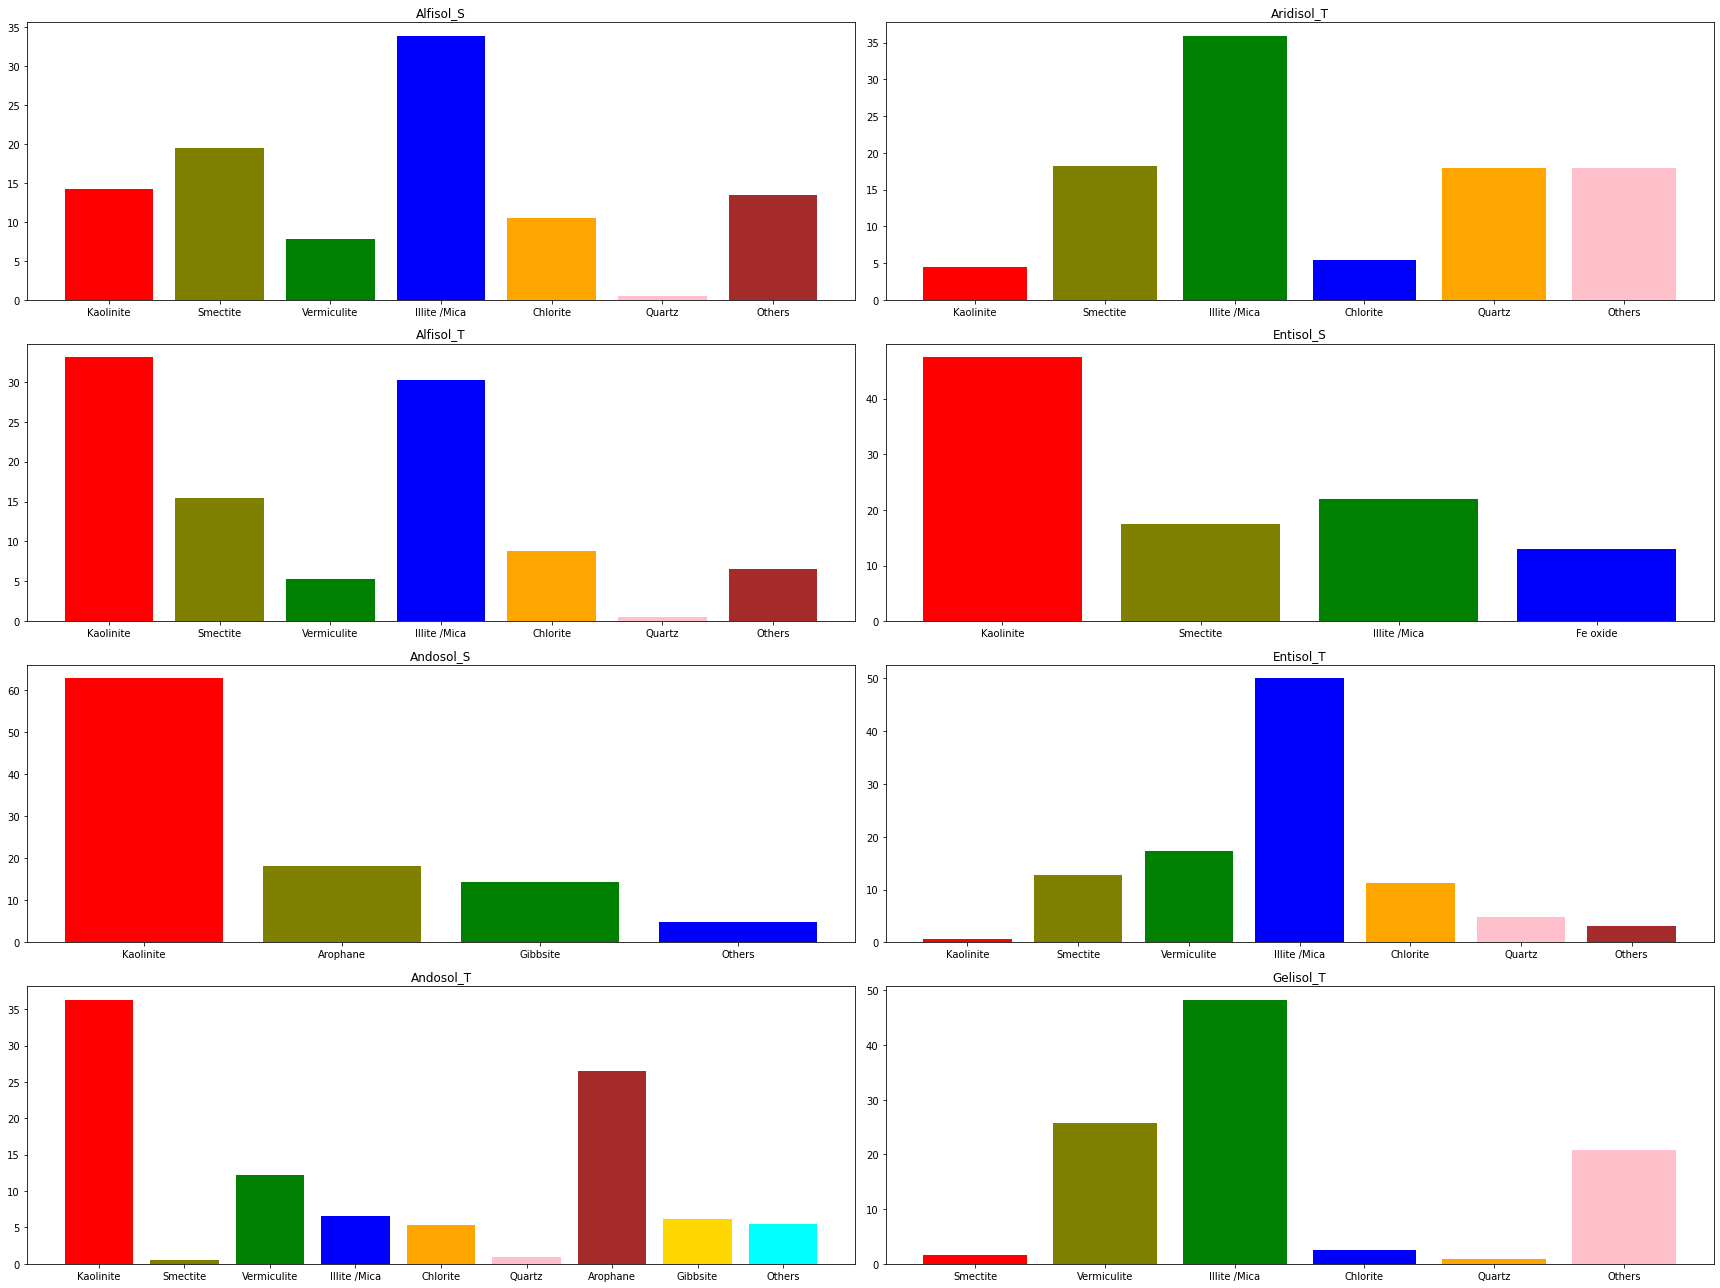

In [9]:
# Save colors to be alloted to each bar
color = ['red','olive','green','blue','orange', 'pink', 'brown', 'gold', 'cyan', 'purple']
# Create subplots with 4 rows and 2 columns as instructed
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(24, 18))
i=0
for eachCol in range(2):
    for eachRow in range(4):
        # Remove the minerals with 0 instances
        nonZeros = clayminerals_grouped.iloc[i][clayminerals_grouped.iloc[i]!=0]
        # Get mineral names
        x = list(nonZeros.keys())
        # Get the counts on minerals
        y = nonZeros.values
        # Plot the bar chart in respective row and column
        axes[eachRow,eachCol].bar(x,y, color=color)
        # Set the title of each bar chart
        axes[eachRow,eachCol].set_title(nonZeros.name[0]+"_"+nonZeros.name[1])
        # increment the index to fetch next type of soil
        i+=1
plt.tight_layout()

### 2. Plotting histograms

- In the file `Datasets/SurfaceTemp/surfaceTemperature.txt`, you will find global surface temperature data that was recorded by the MODIS satellite.
- Inspect the data.
- Import the surface temperature data from `surfaceTemperature.txt` into a pandas `DataFrame`.
- Sort the data.
- Plot the global surface temperature across the globe as a histogram. Plot the mean, median and mode as vertical lines and add a legend. Note that the `mode()` method works a little differently than the other to and you have to turn the result into a `float`. Do these statistics tell us much for this dataset?
- Generate a cumulative distribution function of temperature across the globe.

In [9]:
# Read tempratures file as csv and save as a dataframe
data = pd.read_csv('Datasets/SurfaceTemp/surfaceTemperature.txt', header = None)
# Set the column as temp
data.columns = ['temp']
# Show first 5 rows
data.head()

,temp
0,-8.44
1,-8.72
2,55.58
3,56.40
4,58.20


In [10]:
# Describe the nature of dataset
data.describe()

,temp
count,100000.000000
mean,25.429403
std,30.927338
min,-36.280000
25%,0.160000
50%,25.160000
75%,55.440000
max,85.320000


In [11]:
# Sort the dataset by values
sorted_data = data.sort_values(by='temp')
sorted_data

,temp
32615,-36.28
42143,-36.16
85069,-36.04
3078,-36.00
92423,-36.00
...,...
89622,84.14
16560,84.64
20585,84.98
14475,85.30


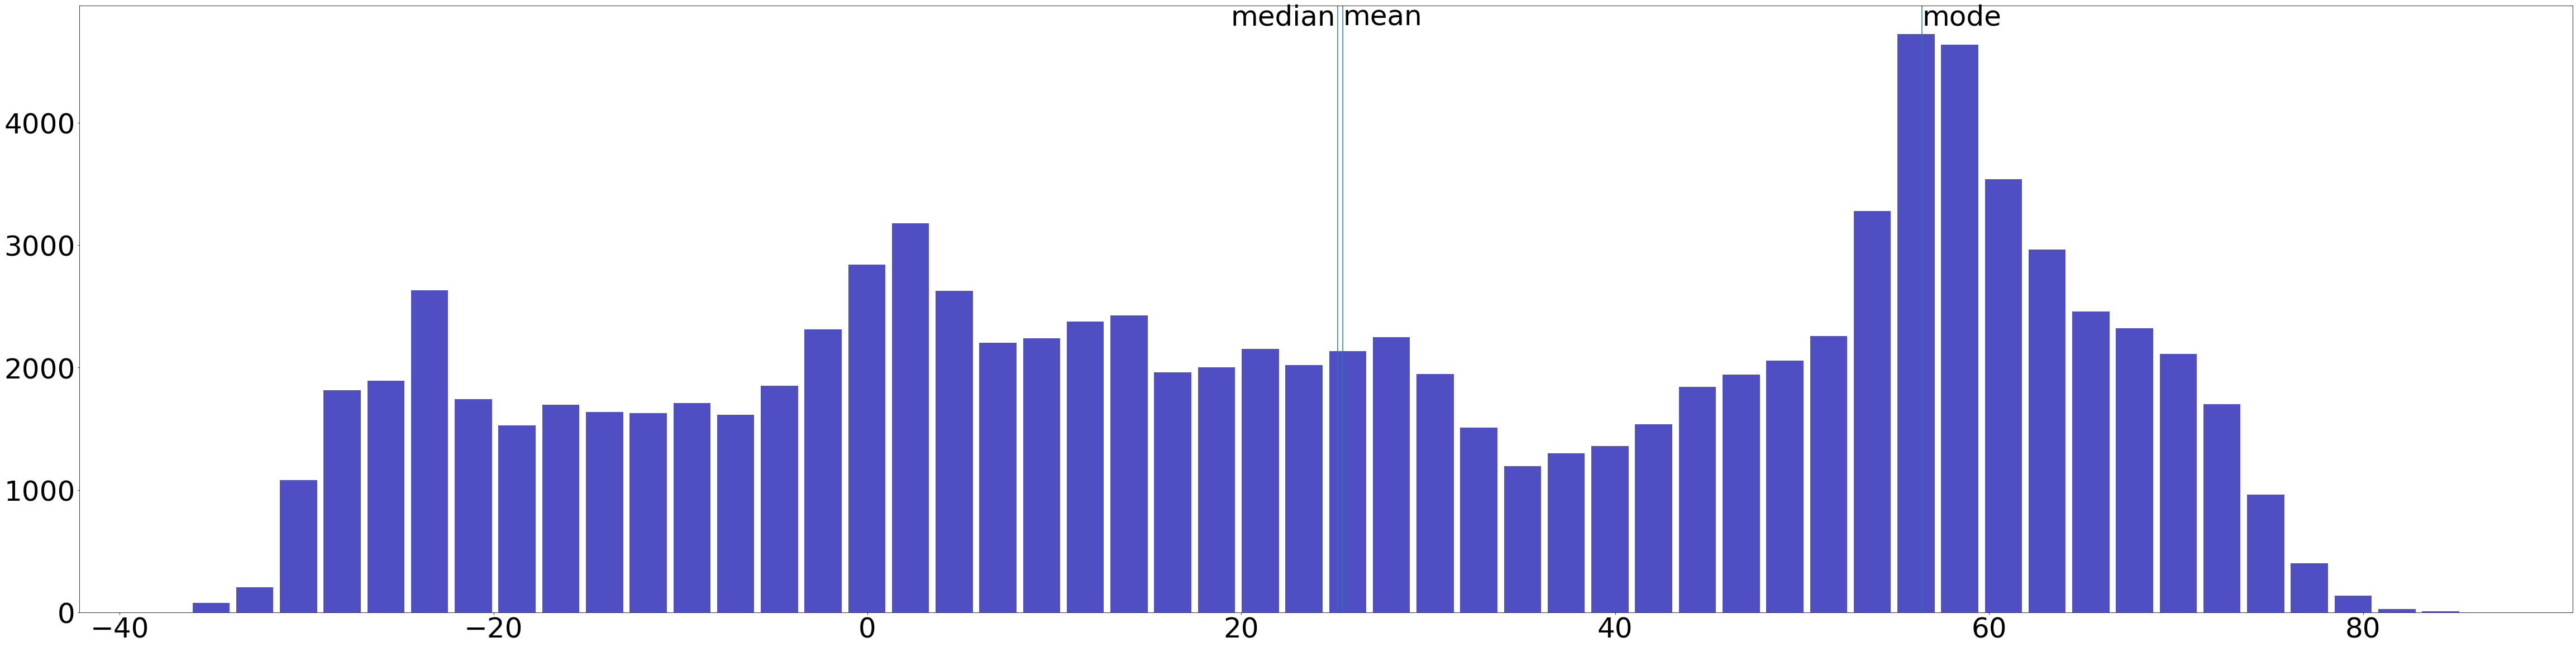

In [12]:
# Create a plot
fig = plt.figure(figsize = (80,20))
# Plot the histogram
plt.hist(x=sorted_data['temp'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
# plot the line for mean
plt.axvline(sorted_data.mean()[0])
# Plot the title for line "mean"
plt.text(sorted_data.mean()[0],4800,'mean',rotation=0, size = 50)
# plot the line for median
plt.axvline(sorted_data.median()[0])
# Plot the title for line "median"
plt.text(sorted_data.mean()[0]-6,4800,'median',rotation=0, size = 50)
# plot the line for mode
plt.axvline(float(sorted_data.mode()['temp']))
# Plot the title for line "mode"
plt.text(float(sorted_data.mode()['temp']),4800,'mode',rotation=0, size = 50)
# Resize x and y ticks
plt.xticks( fontsize=50)
plt.yticks( fontsize=50)
# Plot
plt.show()

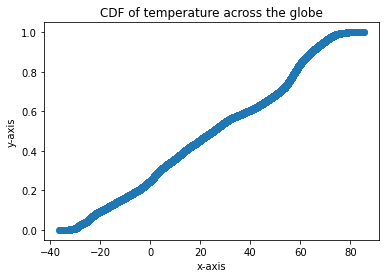

In [13]:
# Save the length of data
N = len(sorted_data)
# Make the CDF of data
y = np.arange(N) / float(N)
# plot the CDF
plt.plot(sorted_data['temp'], y, marker='o')
# Set labels as x axis and y axis
plt.xlabel('x-axis')
plt.ylabel('y-axis')
# Set the title
plt.title('CDF of temperature across the globe')
plt.show()

### 3. Convergence of the mean
- Create a simulated normal distribution with a mean of 0 and a standard deviation of 1.
- Using a `for` loop, create a program that draws a value from the distribution and appends it to a `list`. Do this until your list is 100 values long.
- At each loop of the list, calculate the mean of the values that you have drawn so far. Append the mean to another list.
- Plot the mean of each draw against number of points in the draw as a line plot. Add a red horizontal line at 0.
- How many points does it take for the mean to reasonably approximate an answer of 0?

In [14]:
mean, std = 0, 1 
# Create a simulated normal distribution with a mean of 0 and a standard deviation of 1
stimulated = np.random.normal(mean, std, 1000)
# create empty lists for values to be drawn and their means
lst = list()
means = list()
for i in range(100):
    # Append the drawn value
    lst.append(np.random.choice(stimulated))
    # calculate the mean of drawn values
    lst_mean = sum(lst)/len(lst)
    # Append the mean of drawn values
    means.append(lst_mean)

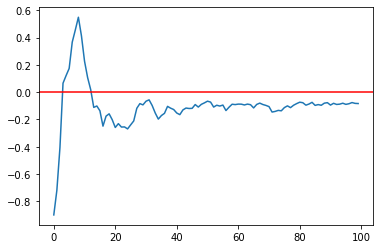

In [15]:
# Plot the mean of each draw against number of points in the draw as a line plot
plt.plot(np.arange(len(means)), means)
# Plot the red line at 0
plt.axhline(0, color = 'r')
plt.show()

Answer: It takes around 80 to 100 points to reasonably approximate an answer of 0

### Reference

Ito, Akihiko, and Rota Wagai. "Global distribution of clay-size minerals on land surface for biogeochemical and climatological studies." Scientific data 4, no. 1 (2017): 1-11.


<div class="alert alert-block alert-danger"><b> 
To receive full credit, your notebook:
    
1. Must have the correct name;
2. Must be fully commented;
3. Must run as expected;
4. Must be submitted into Canvas before the deadline.
</b></div>